# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [12]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [14]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,749,93,51,90,209,69,8,183,36,22,156,211,506,230,70,6,1,189,196
1,831,100,47,70,185,70,7,162,40,20,153,179,406,172,68,9,6,200,205
2,673,91,35,66,159,59,7,147,45,19,131,169,322,123,64,1,1,197,203
3,745,85,43,69,141,62,7,152,44,19,145,178,341,179,84,1,4,181,184
4,401,85,37,80,158,59,8,153,44,19,126,179,348,136,69,6,21,191,197
5,493,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196
6,434,104,51,105,168,54,10,208,32,24,162,220,641,221,72,9,20,187,197
7,826,95,49,92,193,62,10,178,37,21,154,200,478,171,64,2,0,198,206
8,183,84,35,53,122,57,4,116,59,17,123,135,196,128,76,10,27,183,190
9,272,91,43,88,157,61,9,149,45,19,157,165,326,140,64,1,26,197,207


Methods `describe` and `info` deliver some useful information.

In [15]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,429.916211,93.781421,45.094718,82.677596,169.919854,61.837887,8.575592,170.153005,40.601093,20.686703,148.604736,189.925319,446.533698,175.524590,72.644809,6.455373,12.253188,188.888889,195.504554
std,245.306564,8.274683,6.089220,15.663427,33.817740,8.105888,4.803457,33.389133,7.684903,2.622931,14.313055,31.868111,179.348449,32.253583,7.626517,5.082559,8.702274,6.231575,7.516313
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,221.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,147.000000,33.000000,19.000000,138.000000,168.000000,321.000000,151.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,438.000000,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,158.000000,43.000000,20.000000,147.000000,179.000000,366.000000,174.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,642.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,595.000000,198.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [16]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [17]:
### YOUR CODE HERE
filtered_dataset = np.ndarray((0, dataset.shape[1]))
for datarow in dataset:
    # Визуально в 14 колонке есть выбросы со слишком большим значением (118)
    if datarow[14] < 100:
        filtered_dataset = np.vstack((filtered_dataset,datarow))

#Убираем 0 столбец, т.к. он содержит порядковые номера, а не существенные признаки
filtered_dataset = np.delete(filtered_dataset,0,axis=1)
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [41]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

parameters = {'C':np.linspace(1,10,5)}
grid_clf = GridSearchCV(log_reg, parameters, scoring=['f1_micro', 'accuracy'], refit='accuracy')
grid_clf.fit(X_train, y_train)
y_probas = grid_clf.predict_proba(X_test)

c:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\A

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

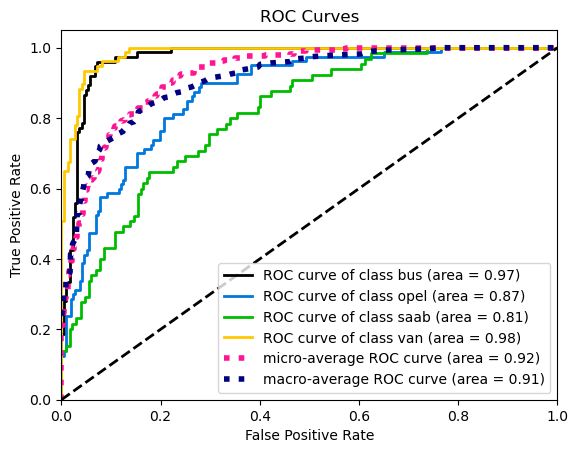

In [19]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_probas)
# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [25]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA(svd_solver='full')
pca.fit(X_train)


PCA(svd_solver='full')

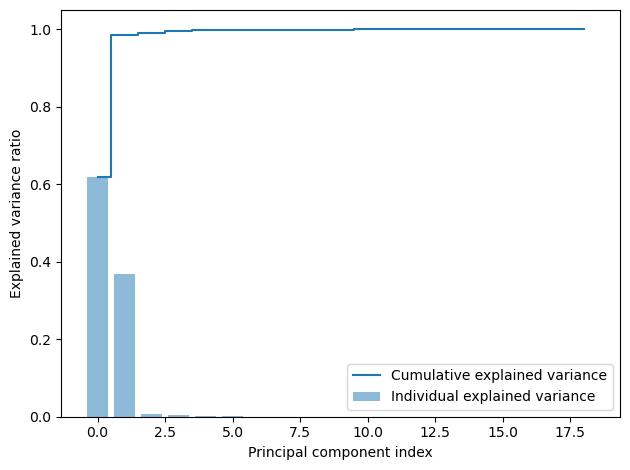

In [26]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Строим график объесняемой дисперсии в зависимости от номера компоненты
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [21]:
### YOUR CODE HERE

## отсеим данные лишние

from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
print(pca.singular_values_)

[5725.20291289 4413.41144384  586.08954102  478.54251332  280.6356105
  196.68582451  159.29056018  156.64146993  123.38852037  110.68698793
   79.2632944    70.09722455   57.47426982   48.88304135   36.06773908
   30.82060146   19.36992498   11.30857495    6.27642882]


Text(0.5, 1.0, 'Значения сингулярных чисел')

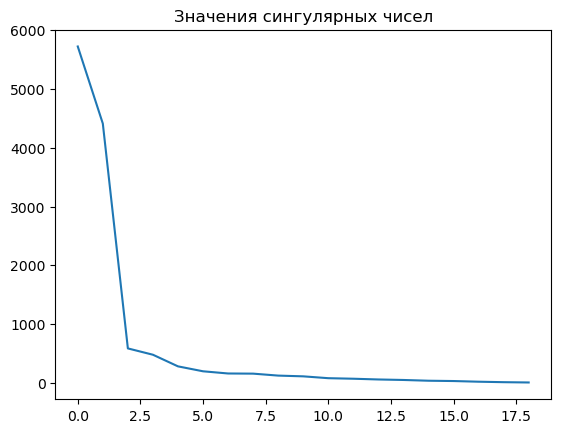

In [22]:
import matplotlib.pyplot as plt
plt.plot(pca.singular_values_)
plt.title("Значения сингулярных чисел")

In [23]:
pca.explained_variance_ratio_

array([6.17948598e-01, 3.67214159e-01, 6.47587604e-03, 4.31729412e-03,
       1.48475960e-03, 7.29317619e-04, 4.78355381e-04, 4.62577052e-04,
       2.87025245e-04, 2.30974334e-04, 1.18444479e-04, 9.26343865e-05,
       6.22755410e-05, 4.50491936e-05, 2.45249665e-05, 1.79082358e-05,
       7.07337139e-06, 2.41093969e-06, 7.42669863e-07])

In [28]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [32]:
### YOUR CODE HERE

param_grid = {
    'C': [0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 10, 100],
    'max_iter':[100,350,500],'multi_class':['multinomial'],
    'penalty': ['l2', 'l1']
}

reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# кросс валидация
clf = GridSearchCV(reg, param_grid, scoring=['f1_macro', 'accuracy'], cv=5, refit='f1_macro')
clf.fit(X_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=reg,
             param_grid={'C': [0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 10, 100], 'penalty': ['l2', 'l1']},
             refit='f1_macro', scoring=['f1_macro', 'accuracy'])

c:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5,
                               0.75, 1, 10, 100],
                         'penalty': ['l2', 'l1']},
             refit='f1_macro', scoring=['f1_macro', 'accuracy'])

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

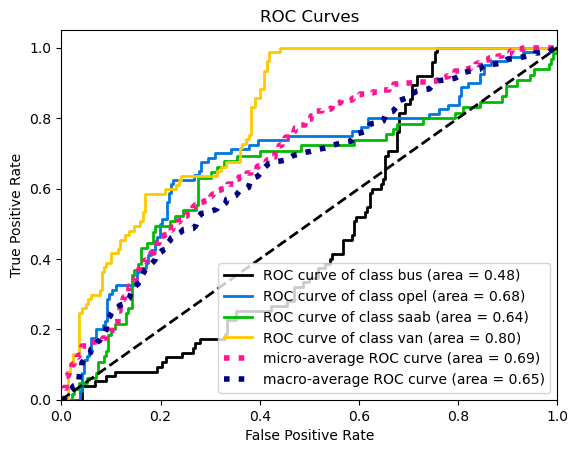

In [34]:
skplt.metrics.plot_roc(y_test, clf.best_estimator_.predict_proba(X_test_pca))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [43]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree,  {'max_depth': range(1, X_train.shape[1]) }, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
best_max_depth = grid_search.best_params_['max_depth']
best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_test)


print("max_depth:", best_max_depth)
print(f"F1 scoree : {f1_score(y_pred_tree,y_test,average='micro')}")

max_depth: 14
F1 scoree : 0.7104377104377103


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

Text(0, 0.5, 'vol')

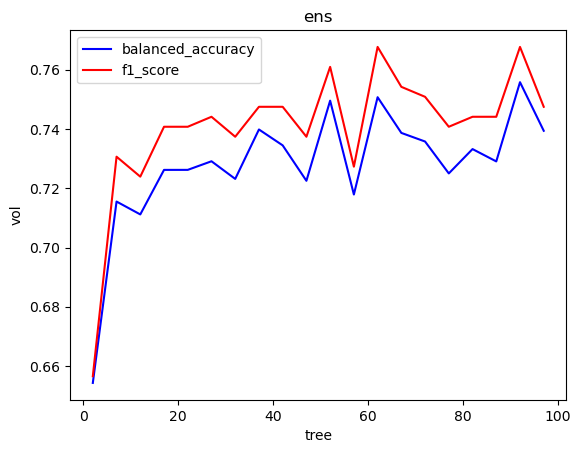

In [46]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
np.random.seed(1)
N = np.arange(2,100,5)
params = {}
for n in N:
    metricks = []
    clf = BaggingClassifier( n_estimators=n,
                        max_samples=X_train.shape[0], max_features=X_train.shape[1], n_jobs=-1)
    model = clf.fit(X_train, y_train)
    bagging_prediction = model.predict(X_test)
    bagging_proba_prediction = model.predict_proba(X_test)
    #metricks.append(accuracy_score(bagging_prediction,y_test))
    metricks.append(balanced_accuracy_score(bagging_prediction,y_test))
    metricks.append(f1_score(bagging_prediction,y_test,average='micro'))
    params[str(n)] = metricks
plt.title('ens')
plt.plot(N,pd.DataFrame(params).to_numpy()[0], color='Blue')
plt.plot(N,pd.DataFrame(params).to_numpy()[1], color='Red')
plt.legend(["balanced_accuracy","f1_score"])
plt.xlabel('tree')
plt.ylabel('vol')


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE